In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import pandas as pd
from jax import numpy as jnp
from jax.random import PRNGKey
import kerax
from kerax import layers
from kerax.models import Model
import matplotlib.pyplot as plt
import optax

In [2]:
# MNIST training data
df = pd.read_csv('train.csv')
labels = df['label'].values
df.drop('label', axis=1, inplace=True)
imgs = df.values.reshape((df.shape[0],28, 28, 1)).astype('float32')
categorical_train_y = kerax.utils.to_categorical(labels, 10)

In [3]:
inputs1 = layers.Input(shape=(28, 28, 1))
conv1 = layers.Conv2D(64, 3, key=PRNGKey(100), activation='relu')(inputs1)
maxpool1 = layers.MaxPool2D(2)(conv1)
conv3 = layers.Conv2D(64, 3, key=PRNGKey(105), activation='relu')(maxpool1)
maxpool3 = layers.MaxPool2D(2)(conv3)
flatten = layers.Flatten()(maxpool3)
dense1 = layers.Dense(512, key=PRNGKey(10), activation='relu')(flatten)
output1 = layers.Dense(10, key=PRNGKey(20))(dense1)

In [4]:
model = Model(inputs1, output1)
model.compile(loss=kerax.losses.CategoricalCrossEntropy(with_logits=True), optimizer=kerax.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [5]:
model.fit(imgs, categorical_train_y, epochs=1, batch_size=128)

 65%|=========================               | 212/328 [01:25<00:46,  2.49batch/s, accuracy=0.953125, loss=0.1458912]   


KeyboardInterrupt: 

In [6]:
idx = 10
img = imgs[idx]
img = jnp.expand_dims(img, axis=0)
print('Predicted:', model(img).argmax())
print('Ground Truth:', labels[idx])

Predicted: 8
Ground Truth: 8


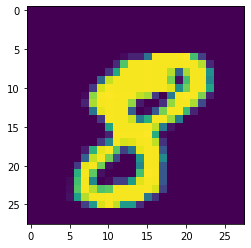

In [7]:
plt.imshow(img[idx])